In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.drop(['name','last_review', 'reviews_per_month'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [5]:
#Is normal check
import scipy.stats as st
st.shapiro(df.price)

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.30046236515045166, pvalue=0.0)

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


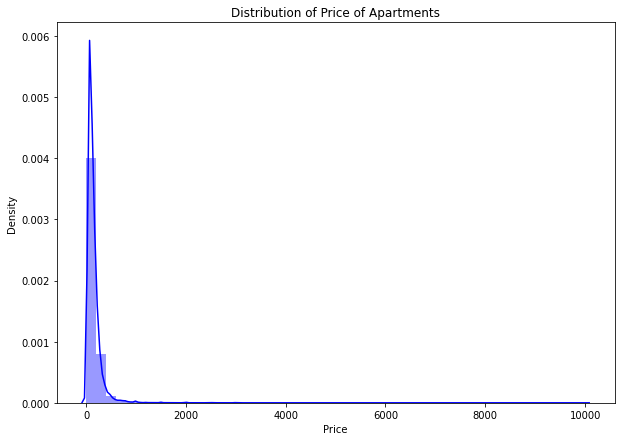

In [6]:
plt.figure(figsize=(10,7))
sns.distplot(df.price,color='b')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


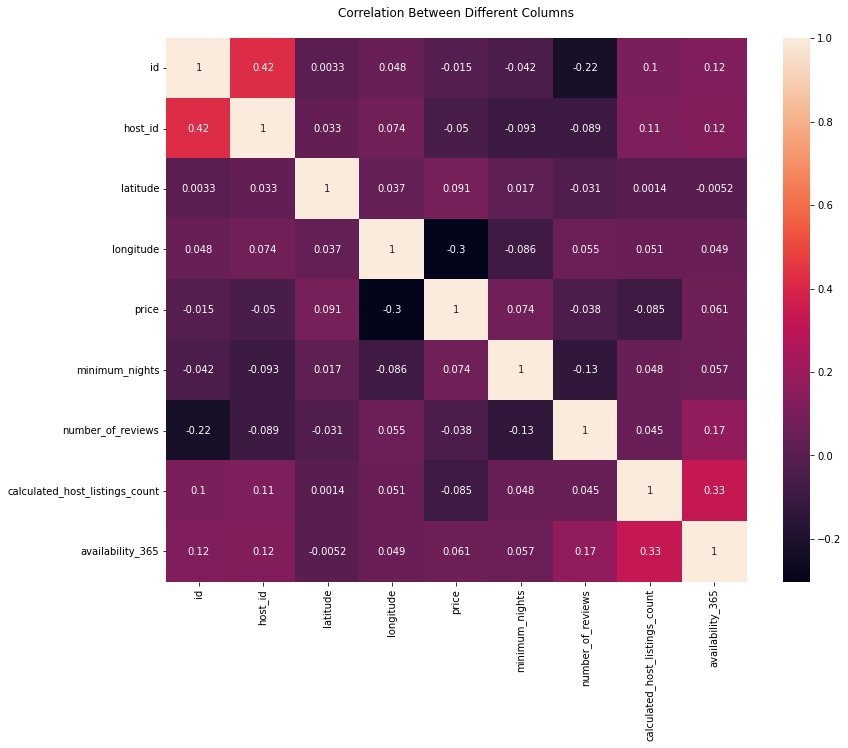

In [8]:
correlation = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Columns\n")
sns.heatmap(correlation, annot=True)
plt.show()

In [9]:
df.groupby('neighbourhood_group')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,165.758937,135.247098,0.0,37.0,148.0,313.5,365.0
Brooklyn,20104.0,100.232292,126.275775,0.0,0.0,28.0,188.0,365.0
Manhattan,21661.0,111.979410,132.677836,0.0,0.0,36.0,230.0,365.0
Queens,5666.0,144.451818,135.538597,0.0,2.0,98.0,286.0,365.0
Staten Island,373.0,199.678284,131.852000,0.0,78.0,219.0,333.0,365.0


In [10]:
print(df['calculated_host_listings_count'].max())

327


In [11]:
print(df['host_id'].value_counts())

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64


In [12]:
print(df['host_name'].value_counts())

Michael          417
David            403
Sonder (NYC)     327
John             294
Alex             279
                ... 
Jiaoyang           1
Margery            1
Jor                1
Mike & Glenna      1
Sevilay            1
Name: host_name, Length: 11452, dtype: int64


In [13]:
grouped = df.groupby(df.host_id)
df_new = grouped.get_group(219517861)
df_new

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
38293,30181691,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,327,309
38294,30181945,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,327,219
38588,30347708,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,327,159
39769,30937590,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,327,91
39770,30937591,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,327,339
47692,35871511,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,327,342
47693,35871515,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,327,347
47814,35936418,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,327,327


In [14]:
df_new['availability_365'].describe()

count    327.000000
mean     301.492355
std       66.677544
min       37.000000
25%      282.500000
50%      328.000000
75%      341.500000
max      365.000000
Name: availability_365, dtype: float64

In [15]:
print(df_new['neighbourhood_group'].value_counts())

Manhattan    327
Name: neighbourhood_group, dtype: int64


In [16]:
print(df_new['room_type'].value_counts())

Entire home/apt    319
Private room         8
Name: room_type, dtype: int64


In [17]:
df_new['price'].describe()

count    327.000000
mean     253.195719
std      119.586884
min      100.000000
25%      188.500000
50%      228.000000
75%      255.000000
max      699.000000
Name: price, dtype: float64

In [18]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [19]:
df_manhattan = df[~(df['neighbourhood_group'] == 'Manhattan')]

In [20]:
df_manhattan['price'].describe()

count    27234.000000
mean       117.601197
std        182.302595
min          0.000000
25%         58.000000
50%         85.000000
75%        139.000000
max      10000.000000
Name: price, dtype: float64

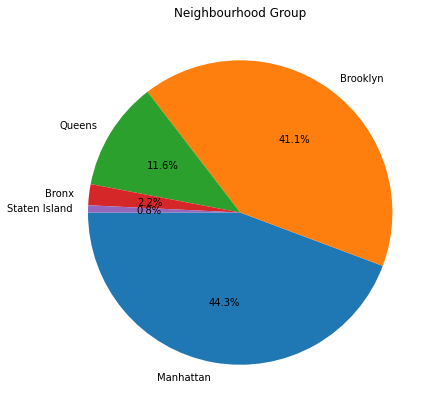

In [21]:
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


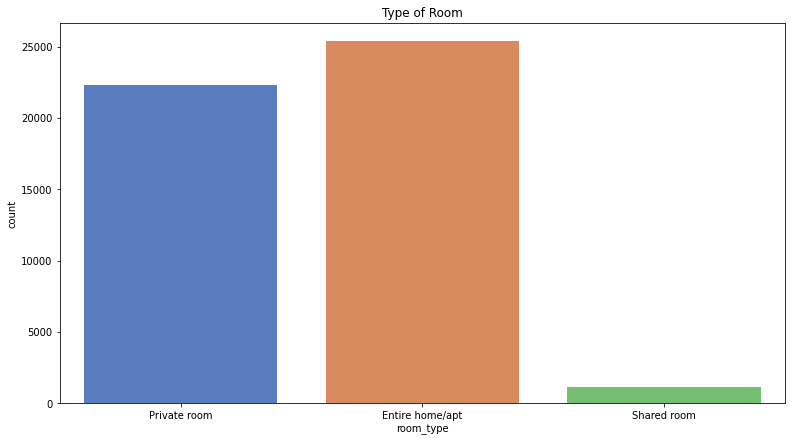

In [22]:
#Room Type vs price
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


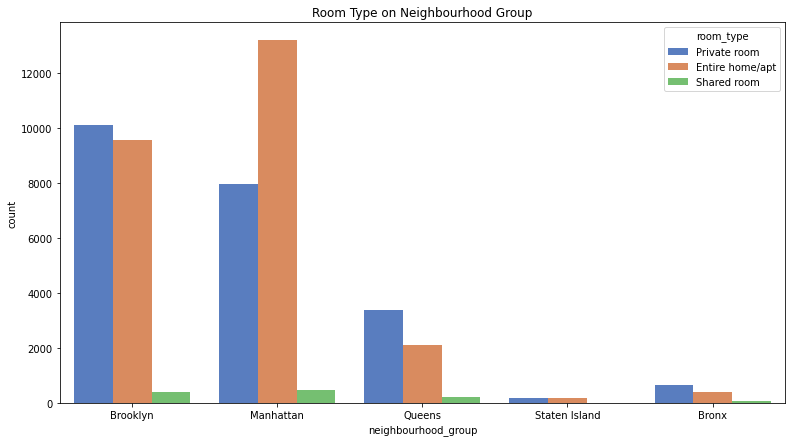

In [23]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

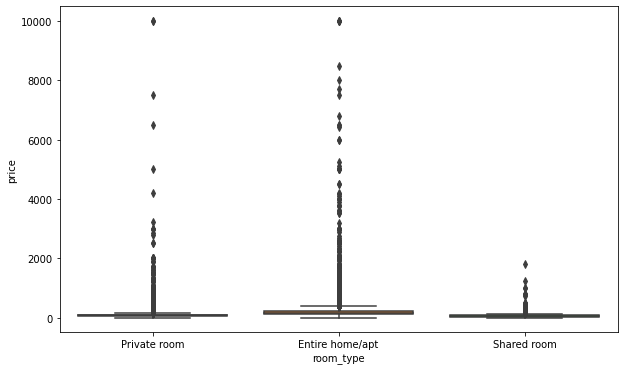

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='room_type',data=df)
plt.show()

In [25]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR=Q3-Q1
df = df[~((df['price']<(Q1-1.5*IQR))|(df['price']>(Q3+1.5-IQR)))]


In [26]:
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
6,5121,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
25,8505,25326,Gregory,Brooklyn,Windsor Terrace,40.65599,-73.97519,Private room,60,1,19,2,85
28,9518,31374,Shon,Manhattan,Inwood,40.86482,-73.92106,Private room,44,3,108,3,311
30,9668,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,3,355
31,9704,32045,Teri,Manhattan,Harlem,40.81305,-73.95466,Private room,52,2,88,1,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,36482231,66058896,Luisa,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,1,31
48889,36484363,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2,163
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36


In [27]:
st.shapiro(df.price)

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9610921740531921, pvalue=0.0)

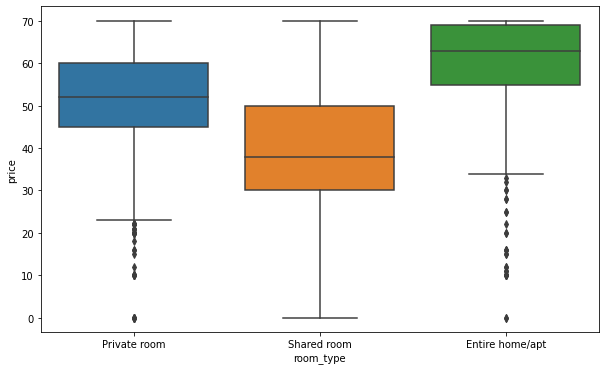

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='room_type',data=df)
plt.show()

In [29]:
df.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,851.0,59.473561,11.872467,0.0,55.0,63.0,69.0,70.0
Private room,11839.0,52.665597,11.445542,0.0,45.0,52.0,60.0,70.0
Shared room,851.0,40.828437,14.152154,0.0,30.0,38.0,50.0,70.0


In [30]:
pvt = df[df['room_type'] == 'Private room']
share = df[df['room_type'] == 'Shared room']
apt = df[df['room_type'] == 'Entire home/apt']

In [31]:
st.f_oneway(pvt.price,share.price,apt.price)

F_onewayResult(statistic=578.5250828895632, pvalue=8.15611677458708e-242)

In [32]:
#price vs Neighbourhood Group
df_Manhattan = df[~(df['neighbourhood_group'] == 'Manhattan')]
df_Brooklyn = df[~(df['neighbourhood_group'] == 'Brooklyn')]
df_Queens = df[~(df['neighbourhood_group'] == 'Queens')]
df_StatenIsland = df[~(df['neighbourhood_group'] == 'Staten Island')]
df_Bronx = df[~(df['neighbourhood_group'] == 'Bronx')]

In [33]:
st.f_oneway(df_Manhattan['price'],df_Brooklyn['price'],df_Queens['price'],df_StatenIsland['price'],df_Bronx['price'])

F_onewayResult(statistic=18.70128334312314, pvalue=2.245204064159687e-15)

In [34]:
#Room Type vs Neighbourhood Group
st.chi2_contingency(pd.crosstab(df['room_type'],df['neighbourhood_group']))

(146.14107914900129,
 1.2499501475608817e-27,
 8,
 array([[  37.64485636,  451.04696847,  179.1744332 ,  172.32420058,
           10.80954139],
        [ 523.71028728, 6274.90606307, 2492.65113359, 2397.35159885,
          150.38091721],
        [  37.64485636,  451.04696847,  179.1744332 ,  172.32420058,
           10.80954139]]))

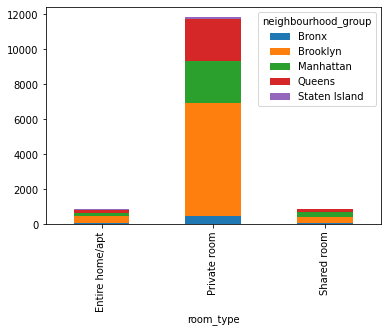

In [35]:
ct = pd.crosstab(df['room_type'],df['neighbourhood_group'])
ct.plot.bar(stacked=True)
plt.show()

In [36]:
#Price vs Neighbourhood Group & Host Name
!pip install statsmodels
from statsmodels.formula.api import ols
model = ols("price~neighbourhood_group+host_name",data=df).fit()

In [37]:
from statsmodels.stats.anova import anova_lm
anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
neighbourhood_group,1.930051e+04,4.0,40.655390,8.217075e-34
host_name,8.922294e+05,4658.0,1.613937,1.378107e-81
Residual,1.052486e+06,8868.0,NaN,NaN


In [38]:
#busy vs price
df_busyiest = df[df['availability_365'] <= 50]
st.ttest_ind(df_busyiest.price, df.price)

Ttest_indResult(statistic=-0.04358518737759523, pvalue=0.9652354795514956)

# Logistic Regression

In [39]:
x = df.drop(columns=['id', 'host_name', 'neighbourhood', 'host_id'])
y = df['price']

In [40]:
x

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
6,Brooklyn,40.68688,-73.95596,Private room,60,45,49,1,0
25,Brooklyn,40.65599,-73.97519,Private room,60,1,19,2,85
28,Manhattan,40.86482,-73.92106,Private room,44,3,108,3,311
30,Manhattan,40.82245,-73.95104,Private room,50,3,242,3,355
31,Manhattan,40.81305,-73.95466,Private room,52,2,88,1,255
...,...,...,...,...,...,...,...,...,...
48882,Brooklyn,40.69652,-73.91079,Private room,40,20,0,1,31
48889,Queens,40.69137,-73.80844,Private room,65,1,0,2,163
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36


In [41]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [42]:
x = encode_and_bind(x, 'neighbourhood_group')

In [43]:
x = encode_and_bind(x, 'room_type')

In [44]:
x

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
6,40.68688,-73.95596,60,45,49,1,0,0,1,0,0,0,0,1,0
25,40.65599,-73.97519,60,1,19,2,85,0,1,0,0,0,0,1,0
28,40.86482,-73.92106,44,3,108,3,311,0,0,1,0,0,0,1,0
30,40.82245,-73.95104,50,3,242,3,355,0,0,1,0,0,0,1,0
31,40.81305,-73.95466,52,2,88,1,255,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,40.69652,-73.91079,40,20,0,1,31,0,1,0,0,0,0,1,0
48889,40.69137,-73.80844,65,1,0,2,163,0,0,0,1,0,0,1,0
48890,40.67853,-73.94995,70,2,0,2,9,0,1,0,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,2,36,0,1,0,0,0,0,1,0


In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13541 entries, 6 to 48893
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           13541 non-null  float64
 1   longitude                          13541 non-null  float64
 2   price                              13541 non-null  int64  
 3   minimum_nights                     13541 non-null  int64  
 4   number_of_reviews                  13541 non-null  int64  
 5   calculated_host_listings_count     13541 non-null  int64  
 6   availability_365                   13541 non-null  int64  
 7   neighbourhood_group_Bronx          13541 non-null  uint8  
 8   neighbourhood_group_Brooklyn       13541 non-null  uint8  
 9   neighbourhood_group_Manhattan      13541 non-null  uint8  
 10  neighbourhood_group_Queens         13541 non-null  uint8  
 11  neighbourhood_group_Staten Island  13541 non-null  uin

In [46]:
y

6        60
25       60
28       44
30       50
31       52
         ..
48882    40
48889    65
48890    70
48891    40
48893    55
Name: price, Length: 13541, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train, y_train)

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_pred = model.predict(x_test)

In [50]:
import tensorflow as tf

In [54]:
def accuracy_with_tolerence(y_true,y_pred):
    threshold = 3
    differnece = tf.abs(tf.subtract(y_true,y_pred)) - threshold
    boolean_results = [True if i < 0 else False for i in differnece]
    return boolean_results.count(True)/len(boolean_results)

In [56]:
acc = accuracy_with_tolerence(y_test, y_pred)
print(acc*100)


74.45551864156515
